We are cleaning up the data

In [5]:
import pandas as pd
from pandas import DataFrame as df
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import sqlite3
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("airport_weather_data.csv")

df.head()

,date,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,showers_sum,snowfall_sum,precipitation_hours,precipitation_probability_max,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,airport
0,2022-11-01 04:00:00+00:00,72.347900,52.187900,0.0,0.0,0.0,0.0,0.0,NaN,6.502709,12.750899,314.35632,MIA
1,2022-11-02 04:00:00+00:00,72.437900,56.867897,0.0,0.0,0.0,0.0,0.0,NaN,7.569527,12.750899,68.40039,MIA
2,2022-11-03 04:00:00+00:00,72.797900,53.987900,0.0,0.0,0.0,0.0,0.0,NaN,7.466353,13.198300,80.68073,MIA
3,2022-11-04 04:00:00+00:00,73.517900,53.357900,0.0,0.0,0.0,0.0,0.0,NaN,8.288983,15.882700,91.86882,MIA
4,2022-11-05 04:00:00+00:00,76.757904,60.647900,0.0,0.0,0.0,0.0,0.0,NaN,10.116089,24.383299,134.06648,MIA


Format the dat to MM-DD-YYYY, and bring the airport name to the front of the dataframe

In [7]:
df["date"] = pd.to_datetime(df["date"]) 
df["formatted_date"] = df["date"].dt.strftime('%d-%m-%Y')


df["precipitation_probability_max"].fillna(0, inplace=True) 
df = df[["airport"] + [col for col in df.columns if col != "airport"]]
df.head()

/var/folders/tq/0lh8dyqx1bn2g4vh2xspxhvm0000gn/T/ipykernel_20910/3933605451.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["precipitation_probability_max"].fillna(0, inplace=True)


,airport,date,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,showers_sum,snowfall_sum,precipitation_hours,precipitation_probability_max,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,formatted_date
0,MIA,2022-11-01 04:00:00+00:00,72.347900,52.187900,0.0,0.0,0.0,0.0,0.0,0.0,6.502709,12.750899,314.35632,01-11-2022
1,MIA,2022-11-02 04:00:00+00:00,72.437900,56.867897,0.0,0.0,0.0,0.0,0.0,0.0,7.569527,12.750899,68.40039,02-11-2022
2,MIA,2022-11-03 04:00:00+00:00,72.797900,53.987900,0.0,0.0,0.0,0.0,0.0,0.0,7.466353,13.198300,80.68073,03-11-2022
3,MIA,2022-11-04 04:00:00+00:00,73.517900,53.357900,0.0,0.0,0.0,0.0,0.0,0.0,8.288983,15.882700,91.86882,04-11-2022
4,MIA,2022-11-05 04:00:00+00:00,76.757904,60.647900,0.0,0.0,0.0,0.0,0.0,0.0,10.116089,24.383299,134.06648,05-11-2022


Now, we need to normalize everything except the airport since we will need that to be able to join our database tables together

The different normalization for each variable, variables that have a 

In [8]:
df.head()

,airport,date,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,showers_sum,snowfall_sum,precipitation_hours,precipitation_probability_max,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,formatted_date
0,MIA,2022-11-01 04:00:00+00:00,72.347900,52.187900,0.0,0.0,0.0,0.0,0.0,0.0,6.502709,12.750899,314.35632,01-11-2022
1,MIA,2022-11-02 04:00:00+00:00,72.437900,56.867897,0.0,0.0,0.0,0.0,0.0,0.0,7.569527,12.750899,68.40039,02-11-2022
2,MIA,2022-11-03 04:00:00+00:00,72.797900,53.987900,0.0,0.0,0.0,0.0,0.0,0.0,7.466353,13.198300,80.68073,03-11-2022
3,MIA,2022-11-04 04:00:00+00:00,73.517900,53.357900,0.0,0.0,0.0,0.0,0.0,0.0,8.288983,15.882700,91.86882,04-11-2022
4,MIA,2022-11-05 04:00:00+00:00,76.757904,60.647900,0.0,0.0,0.0,0.0,0.0,0.0,10.116089,24.383299,134.06648,05-11-2022


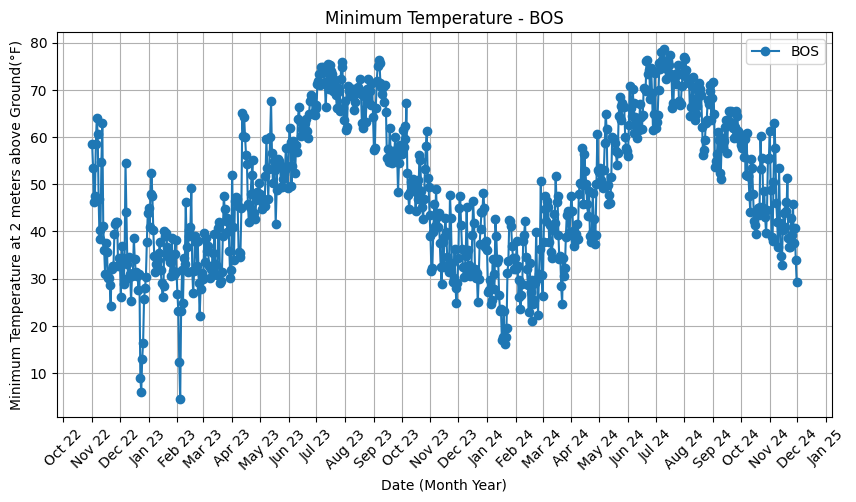

In [9]:
airports = df['airport'].unique()

# Create a plot for each airport

plt.figure(figsize=(10, 5))

# Filter data for this airport
airport_data = df[df['airport'] == "BOS"]
# Plot temperature over time
plt.plot(airport_data['date'], airport_data['temperature_2m_min'], marker='o', linestyle='-', label=f'{airport_data["airport"].iloc[0]}')

# Formatting
plt.xlabel('Date (Month Year)')
plt.ylabel('Minimum Temperature at 2 meters above Ground(°F)')
plt.title(f'Minimum Temperature - {airport_data["airport"].iloc[0]}')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Show 1st of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Format as "Jan 2025"

plt.xticks(rotation=45)
# Show the plot
plt.show()

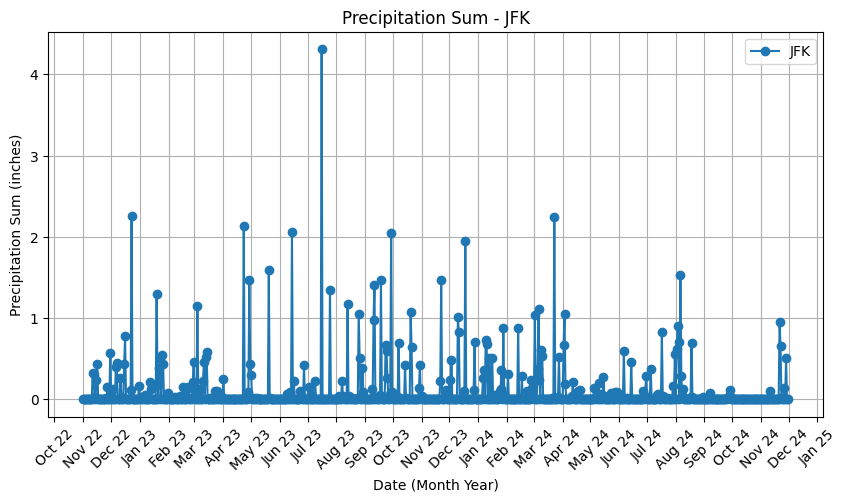

In [10]:
airports = df['airport'].unique()

# Create a plot for each airport

plt.figure(figsize=(10, 5))

# Filter data for this airport
airport_data = df[df['airport'] == "JFK"]
# Plot temperature over time
plt.plot(airport_data['date'], airport_data['precipitation_sum'], marker='o', linestyle='-', label=f'{airport_data["airport"].iloc[0]}')

# Formatting
plt.xlabel('Date (Month Year)')
plt.ylabel('Precipitation Sum (inches)')
plt.title(f'Precipitation Sum - {airport_data["airport"].iloc[0]}')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Show 1st of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Format as "Jan 2025"

plt.xticks(rotation=45)
# Show the plot
plt.show()

Calculate the percentag eof precipitation_sum that are 0

In [22]:
percentage_0_values = (df['precipitation_sum'] == 0).sum() / len(df['precipitation_sum'])
print(percentage_0_values)

0.738939991239597


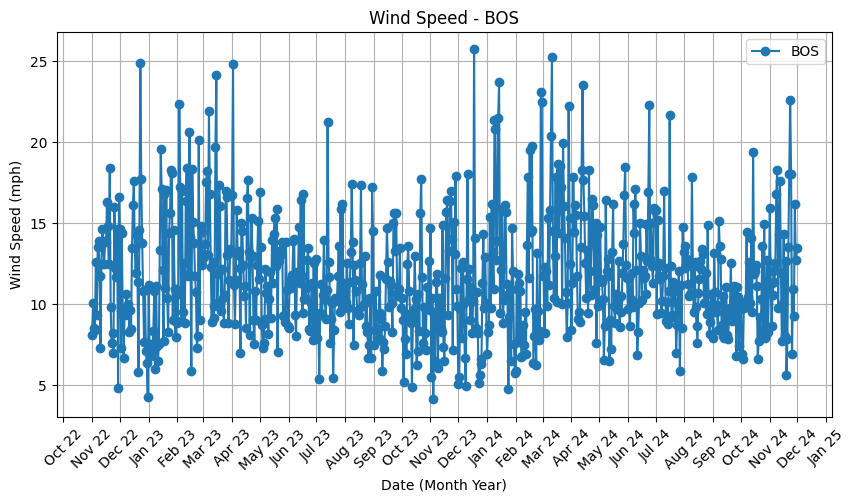

In [11]:
airports = df['airport'].unique()

# Create a plot for each airport

plt.figure(figsize=(10, 5))

# Filter data for this airport
airport_data = df[df['airport'] == "BOS"]
# Plot temperature over time
plt.plot(airport_data['date'], airport_data['wind_speed_10m_max'], marker='o', linestyle='-', label=f'{airport_data["airport"].iloc[0]}')

# Formatting
plt.xlabel('Date (Month Year)')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Wind Speed - {airport_data["airport"].iloc[0]}')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Show 1st of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Format as "Jan 2025"

plt.xticks(rotation=45)
# Show the plot
plt.show()

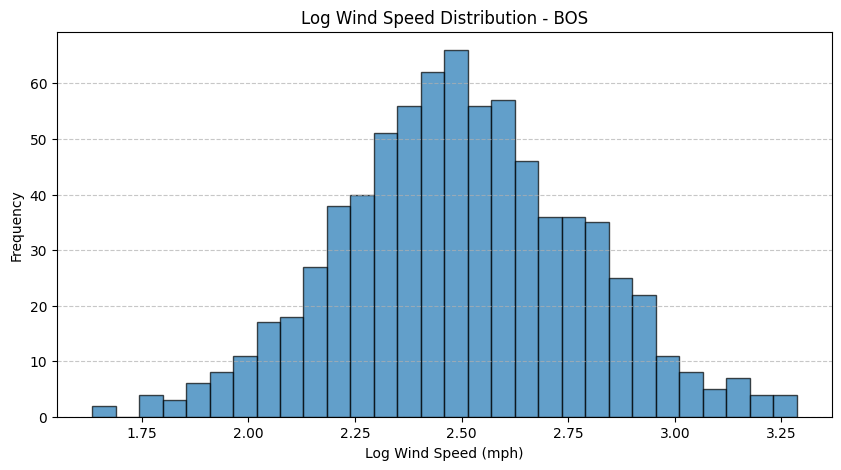

In [23]:
df['wind_speed_log'] = np.log1p(df['wind_speed_10m_max'])
airport_data = df[df['airport'] == "BOS"]

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(airport_data['wind_speed_log'], bins=30, edgecolor='black', alpha=0.7)

# Formatting
plt.xlabel('Log Wind Speed (mph)')
plt.ylabel('Frequency')
plt.title(f'Log Wind Speed Distribution - {airport_data["airport"].iloc[0]}')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

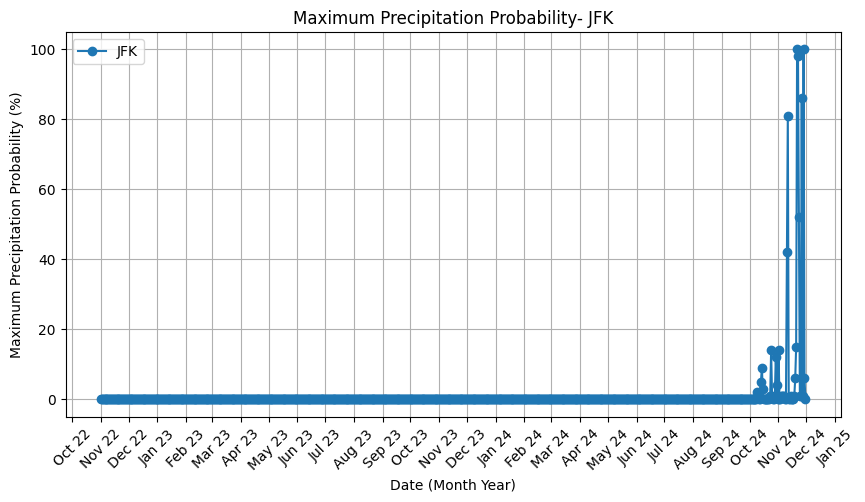

In [12]:
airports = df['airport'].unique()

# Create a plot for each airport

plt.figure(figsize=(10, 5))

# Filter data for this airport
airport_data = df[df['airport'] == "JFK"]
# Plot temperature over time
plt.plot(airport_data['date'], airport_data['precipitation_probability_max'], marker='o', linestyle='-', label=f'{airport_data["airport"].iloc[0]}')

# Formatting
plt.xlabel('Date (Month Year)')
plt.ylabel('Maximum Precipitation Probability (%)')
plt.title(f'Maximum Precipitation Probability- {airport_data["airport"].iloc[0]}')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Show 1st of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Format as "Jan 2025"

plt.xticks(rotation=45)
# Show the plot
plt.show()

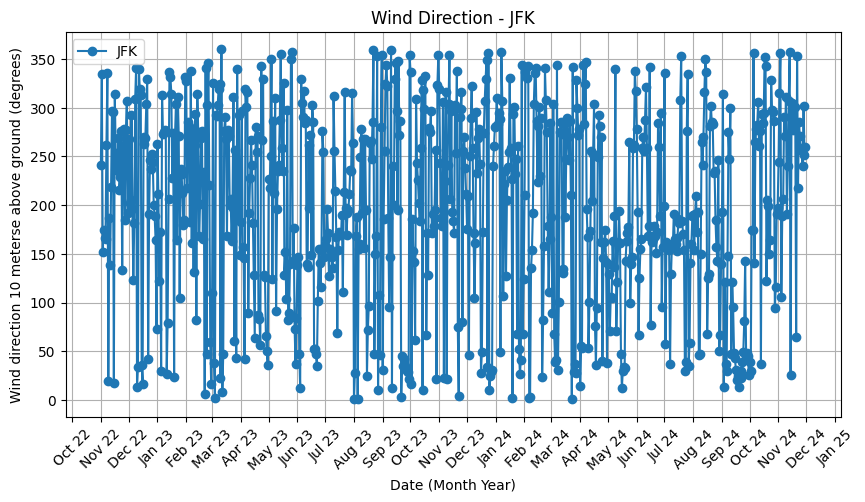

In [16]:
airports = df['airport'].unique()

# Create a plot for each airport

plt.figure(figsize=(10, 5))

# Filter data for this airport
airport_data = df[df['airport'] == "JFK"]
# Plot temperature over time
plt.plot(airport_data['date'], airport_data['wind_direction_10m_dominant'], marker='o', linestyle='-', label=f'{airport_data["airport"].iloc[0]}')

# Formatting
plt.xlabel('Date (Month Year)')
plt.ylabel('Wind direction 10 meterse above ground (degrees)')
plt.title(f'Wind Direction - {airport_data["airport"].iloc[0]}')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # Show 1st of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Format as "Jan 2025"

plt.xticks(rotation=45)
# Show the plot
plt.show()

In [13]:
df.drop(columns=['precipitation_probability_max'], inplace=True)
df.head()

,airport,date,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,showers_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,formatted_date
0,MIA,2022-11-01 04:00:00+00:00,72.347900,52.187900,0.0,0.0,0.0,0.0,0.0,6.502709,12.750899,314.35632,01-11-2022
1,MIA,2022-11-02 04:00:00+00:00,72.437900,56.867897,0.0,0.0,0.0,0.0,0.0,7.569527,12.750899,68.40039,02-11-2022
2,MIA,2022-11-03 04:00:00+00:00,72.797900,53.987900,0.0,0.0,0.0,0.0,0.0,7.466353,13.198300,80.68073,03-11-2022
3,MIA,2022-11-04 04:00:00+00:00,73.517900,53.357900,0.0,0.0,0.0,0.0,0.0,8.288983,15.882700,91.86882,04-11-2022
4,MIA,2022-11-05 04:00:00+00:00,76.757904,60.647900,0.0,0.0,0.0,0.0,0.0,10.116089,24.383299,134.06648,05-11-2022


In [14]:
# Create (or connect to) an SQLite database
db_name = "weather_data.db"  # Name of the database file
conn = sqlite3.connect(db_name)
cursor = conn.cursor()
# Save dataframe to SQLite table named 'weather'
df.to_sql("weather", conn, if_exists="replace", index=False)

# Close connection
conn.close()